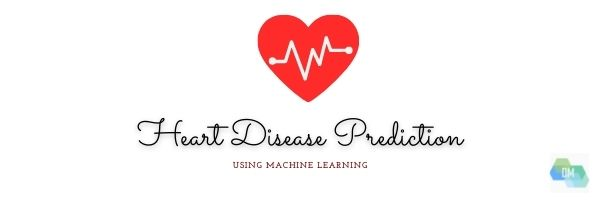

<blockquote>This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). </blockquote>

### <h3 style="background-color:#cad2c5;color:#800f2f;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import time for training details
from time import time
t0 = time()

import warnings
warnings.filterwarnings('ignore')

### <h3 style="background-color:#cad2c5;color:#800f2f;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [ ]:
df_heart= pd.read_csv("../input/heart-disease-uci/heart.csv")

In [ ]:
df_heart_row_count, df_heart_column_count=df_heart.shape
print('Total number of rows:', df_heart_row_count)
print('Total number of columns:', df_heart_column_count)

### <h3 style="background-color:#cad2c5;color:#800f2f;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>What does this dataset contain? </centre></strong></h3>

In [ ]:
df_heart.info()

In [ ]:
df_heart.describe()

### <h3 style="background-color:#cad2c5;color:#800f2f;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [ ]:
df_heart.isna().sum()

In [ ]:
df_heart.head().iloc[:5]

In [ ]:
print ("Unique values are:\n",df_heart.nunique())

In [ ]:
df_heart.target.value_counts()

In [ ]:
df_heart.sex.value_counts()

In [ ]:
# check gender distribution in the dataset
gender_dist = df_heart.groupby('sex')[['sex']].count()
colors_list = ['blue', 'darksalmon']
plt.pie(gender_dist['sex'], labels = ['Female','Male'], autopct = '%1.1f%%', colors=['#ffadad','#89c2d9'],shadow=True, startangle=90,explode=[0.1, 0.005])
plt.title("Gender distribution",color = 'black', fontsize = '14')
plt.show()

In [ ]:
#Getting an idea about the distribution of gender 
p = sns.countplot(data=df_heart, x = 'sex', palette='RdBu_r')

### <h3 style="background-color:#cad2c5;color:#800f2f;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Effect of different attributes on target outcome✏️ </centre></strong></h3>

In [ ]:
df_ht = ['sex','cp','restecg','fbs','ca','slope','thal', 'target']

fig, axs = plt.subplots(4, 2, figsize=(10,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_ht):
    sns.countplot(x=col_name, data=df_heart, ax=axs[i], hue =df_heart['target'], palette= 'RdBu_r')
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

### <h3 style="background-color:#cad2c5;color:#800f2f;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Plotting correlation map for features </centre></strong></h3>

In [ ]:
#correlation map for features
f,ax = plt.subplots(figsize=(12, 12))
ax.set_title('Correlation map for variables')
sns.heatmap(df_heart.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="coolwarm_r")

### <h3 style="background-color:#cad2c5;color:#800f2f;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Plots to understand the distribution of the data 🔍</centre></strong></h3>

In [ ]:
#Getting an idea about the distribution of gender with cholestrol 
p = sns.barplot(data=df_heart, x = 'sex',y='chol', palette='RdBu_r')

In [ ]:
cp_dist = pd.DataFrame(df_heart.groupby(by=['sex','target','cp'],axis=0)['age'].count())
cp_dist.columns = ['Total Count']
cp_dist.index.names = ['Gender','Heart Disease 0/1','Chest Pain Type']
cp_dist

In [ ]:
sns.set(style="whitegrid")
p = sns.countplot(data=df_heart, x = 'cp', hue='target', palette='RdBu_r')

### <h3 style="background-color:#cad2c5;color:#800f2f;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>More plots to understand the distribution of the data 🔍</centre></strong></h3>

In [ ]:
df_heart['trestbps'].plot(kind='hist',density=True,figsize=(4,4))
df_heart['trestbps'].plot(kind='density')
plt.xlabel('restbp')
plt.ylabel('density value')
plt.title('Resting Blood pressure value')

In [ ]:
df_heart['ca'].plot(kind='hist',density=True,figsize=(4,4))
df_heart['ca'].plot(kind='density')
plt.xlabel('chol')
plt.ylabel('density')
plt.title('ca')

### <h3 style="background-color:#cad2c5;color:#800f2f;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Dataset split for prediction ⏳ </centre></strong></h3>

In [ ]:
#Defining X and y
X = df_heart.drop(['target'], axis=1)
y = df_heart['target']

# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

### <h3 style="background-color:#cad2c5;color:#800f2f;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Applying machine learning algorithms</centre></strong></h3>

In [ ]:
# 1. Using Random Forest Classifier
t0 = time()
# Load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)
rf_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', rf_time)

#Print Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

In [ ]:
#2. Gaussian Naive Bayes Classifier
t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the Classifier/fitting the model
gnb.fit(X_train, y_train)

# predict the response
y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_test,y_test) * 100, 2)
gnb_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Gaussian Naïve Bayes Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', gnb_time)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

In [ ]:
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10)

# Train the Classifier/fitting the model
clf = clf.fit(X_train,y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_dt = round(clf.score(X_test,y_test) * 100, 2)
dt_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score 

# evaluate accuracy
print ("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', dt_time)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

In [ ]:
#kNN
import sys, os

# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the Classifier/fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
knn_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("kNN Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', knn_time)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

In [ ]:
#Support Vector Machines trial
import sys, os

#Import svm model
from sklearn import svm
from sklearn.svm import SVC

#Create a svm Classifier
clf = SVC(C=1, kernel='rbf')

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_svm = round(clf.score(X_test,y_test) * 100, 2)
svm_time=(round(time() - t0, 3))
# evaluate accuracy
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', svm_time)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

### <h3 style="background-color:#cad2c5;color:#800f2f;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Visualizing Accuracies for all ML Algorithms 📊 </centre></strong></h3>

In [ ]:
# visualizing accuracies for all ML Algorithms using Matplotlib
predictors_group = ('Random Forest', 'GaussianNB', 'DecisionTree','kNN','SVM')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_rf, acc_gnb, acc_dt,acc_knn, acc_svm]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='blue')
plt.grid(False)
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

In [ ]:
#printing top three accuracies with training time

print('Decision Tree:', acc_dt,'%','with', dt_time,'s')
print('Random Forest:', acc_rf,'%','with', rf_time,'s')
print('GaussianNB:',acc_gnb,'%','with', gnb_time,'s')

In [ ]:
# importing the model for prediction

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# creating list of tuple wth model and its name  
models = []
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GNB',GaussianNB()))

### <h3 style="background-color:#cad2c5;color:#800f2f;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Cross Validation </centre></strong></h3>

In [ ]:
# Import Cross Validation 
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=42, shuffle=True)
kf.get_n_splits(X)
# print(kf)

acc = []   # All Algorithm/model accuracies
names = []    # All model name

for name, model in models:
    
    acc_of_model = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy') # kFolds =5 without shuffling
    
    acc.append(acc_of_model) # appending Accuray of different model to acc List
    
    names.append(name)# appending name of models
    Acc =name,round(acc_of_model.mean()*100,2) # printing Output 
    print(Acc)

In [ ]:
# Plotting all accuracies together for comparison
# using the values for accuracies from previous steps
# these accuracies might vary slightly with each run. Hence,these need to be updated here before plotting

labels = ['Decision Tree', 'Random Forest','Gaussian NB']
NoCV =[81.97, 83.61,86.89] # accuracy before Cross Validation
CV=[70.25, 78.09, 80.16] # accuracy after Cross Validation 

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

f, ax = plt.subplots(figsize=(10,8)) 
p1 = ax.bar(x - width/2, CV, width, label='After Cross Validation', color='#89c2d9')
p2 = ax.bar(x + width/2, NoCV, width, label='Before Cross Validation', color='#ffadad')

# Add some text for labels and title 
ax.set_ylabel('Accuracies')
ax.set_title('Accuracy comparison')
ax.set_xticks(x)
plt.xticks()
ax.set_xticklabels(labels)
ax.legend(loc='best')
plt.show()

In [ ]:
#splitting dataframe to create a new dataframe & test algorithm for female group separately

# on basis of column value for gender
# using dataframe.groupby() function to create dataframe df_women
df_women = df_heart[df_heart['sex'] == 0]

In [ ]:
df_women.info()

In [ ]:
print (df_women)

In [ ]:
print('df_women:', df_women.shape)

In [ ]:
#Defining X and y
Xw = df_women.drop(['target'], axis=1)
yw = df_women['target']

# creating dataset split for prediction
from sklearn.model_selection import train_test_split
Xw_train, Xw_test , yw_train , yw_test = train_test_split(Xw,yw,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('Xw_train:', Xw_train.shape)
print('yw_train:', yw_train.shape)
print('Xw_test:', Xw_test.shape)
print('yw_test:', yw_test.shape)

In [ ]:
#Gaussian Naive Bayes Classifier
t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the Classifier/fitting the model
gnb.fit(Xw_train, yw_train)

# predict the response
yw_pred = gnb.predict(Xw_test)
acc_gnb = round(gnb.score(Xw_test,yw_test) * 100, 2)
gnb_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Gaussian Naive Bayes Accuracy:",metrics.accuracy_score(yw_test, yw_pred)*100,"%")
print('Training time', gnb_time)
cm = pd.DataFrame(confusion_matrix(yw_test, yw_pred))
sns.heatmap(cm, annot=True, cmap="coolwarm_r")